In [1]:
from ipynb_path import *

In [2]:
from counterfactual.import_essentials import *
# plt.style.use(['science',  'bright'])
plt.style.use(['science',  'vibrant'])


In [3]:
attacker_n_steps = pd.read_csv('assets/result/loan-CounterNet-attack.csv').\
    rename(columns={'Unnamed: 0': 'n_steps'})

In [4]:
attacker_n_steps_AdvCounterNet = pd.read_csv('assets/result/loan-AdvCounterNet-attack.csv').\
    rename(columns={'Unnamed: 0': 'n_steps'})

In [5]:
attacker_eps_CounterNet = pd.read_csv('assets/result/loan-CounterNet-attack-eps.csv').\
    rename(columns={'Unnamed: 0': 'eps'})

In [6]:
attacker_eps_AdvCounterNet = pd.read_csv('assets/result/loan-AdvCounterNet-attack-eps.csv').\
    rename(columns={'Unnamed: 0': 'eps'})

In [7]:
attacker_n_steps

,n_steps,mean,std
0,1,0.985445,0.012491
1,2,0.984889,0.012427
2,3,0.983528,0.014807
3,5,0.980313,0.014144
4,7,0.971602,0.023426
5,10,0.947051,0.066511
6,13,0.913563,0.108871
7,15,0.886424,0.124570
8,20,0.753567,0.179165


In [5]:
def plot_attacker(attacker_cfnet, attacker_advcfnet, col_name, xlabel, equal_xticks: bool = False, ylim: tuple = (0.5, 1.05)):
    fig, ax = plt.subplots(figsize=(4,3))
    if equal_xticks:
        x = np.arange(1, len(attacker_cfnet) + 1)
    else:
        x = attacker_cfnet[col_name].values
    # ax.errorbar(x_1, 
    #             attacker_cfnet['mean'].values, 
    #             yerr=attacker_cfnet['std'].values, 
    #             fmt='o-', capsize=5, label='CounterNet')
    # ax.errorbar(x_2, 
    #             attacker_advcfnet['mean'].values, 
    #             yerr=attacker_advcfnet['std'].values, 
    #             fmt='o-', capsize=5, label='RoCourseNet')

    for label, data in zip(['RoCourseNet', 'CounterNet'], [attacker_advcfnet, attacker_cfnet]):
        y = data['mean'].values
        e = data['std'].values
        if label == 'CounterNet':
            ax.errorbar(x, y, e, fmt='o-', capsize=5, label=label, marker="s", linestyle='--')
        else:
            ax.errorbar(x, y, e, fmt='o-', capsize=5, label=label)
        data = {
            'x': x,
            'y1': y - e,
            'y2': y + e
        }
        plt.fill_between(**data, alpha=.25)


    ax.set_xlabel(xlabel)
    ax.set_ylabel("Robust Validity")
    ax.set_ylim(ylim)
    # ax.set_title('Rob')
    ax.set_xticks(x)
    ax.set_xticklabels([str(n) for n in attacker_cfnet[col_name]])
    ax.legend()
    return fig


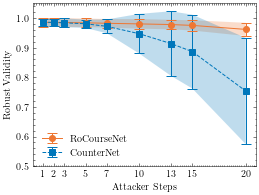

In [31]:
plot_attacker(attacker_n_steps, attacker_n_steps_AdvCounterNet, 'n_steps', 'Attacker Steps').savefig('images/attacker_n_steps.pdf')

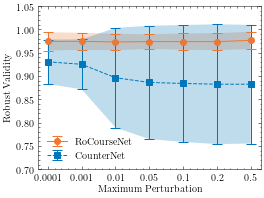

In [32]:
plot_attacker(attacker_eps_CounterNet, attacker_eps_AdvCounterNet, 'eps', 'Maximum Perturbation', 
    equal_xticks=True, ylim=(0.7, 1.05)).savefig('images/attacker_eps.pdf',)

### $L_2$ norm

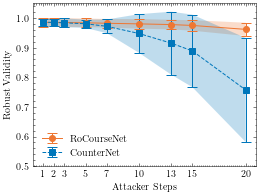

In [6]:
attacker_n_steps = pd.read_csv('assets/result/loan-CounterNet-attack-l2.csv').\
    rename(columns={'Unnamed: 0': 'n_steps'})
attacker_n_steps_AdvCounterNet = pd.read_csv('assets/result/loan-AdvCounterNet-attack-l2.csv').\
    rename(columns={'Unnamed: 0': 'n_steps'})
plot_attacker(attacker_n_steps, attacker_n_steps_AdvCounterNet, 'n_steps', 'Attacker Steps').savefig('images/attacker_n_steps_l2.pdf')

In [5]:
for year in range(1994, 2010):
    model_path = [x for x in Path(f'../log/AdvCounterNet-loanadv/loan/year={year}/version_5/checkpoints/').iterdir()][-1]
    Path(f"assets/weights/AdvCounterNet_loan/{year}").mkdir()
    shutil.copy(model_path, Path(f"assets/weights/AdvCounterNet_loan/{year}"))

In [14]:
for year in range(1994, 2010):
    model_path = [x for x in Path(f'../log/CounterNet/adv/loan/year={year}/version_1/checkpoints/').iterdir()][-1]
    Path(f"assets/weights/CounterNet-loan/{year}").mkdir()
    shutil.copy(model_path, Path(f"assets/weights/CounterNet-loan/{year}"))